In [58]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [ ]:
# data cleaning:
# - handling outliers
# - handling missing values
# - normality test

In [13]:
iris_dataset = load_iris(as_frame=True)

In [19]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
df = iris_dataset['frame']

In [25]:
df['target'] =  df['target'].map({i:v for i, v in enumerate(iris_dataset['target_names'])})

In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
df['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## make data training and data testing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], 
    df['target'], 
    test_size=0.2, 
#     random_state=42
)

In [45]:
len(X_train)

120

In [46]:
len(X_test)

30

In [47]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
112,6.8,3.0,5.5,2.1
94,5.6,2.7,4.2,1.3
63,6.1,2.9,4.7,1.4
52,6.9,3.1,4.9,1.5
...,...,...,...,...
68,6.2,2.2,4.5,1.5
49,5.0,3.3,1.4,0.2
27,5.2,3.5,1.5,0.2
102,7.1,3.0,5.9,2.1


In [48]:
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

SVC()

In [49]:
y_pred_train = model_svm.predict(X_train)
y_pred_test = model_svm.predict(X_test)

In [50]:
accuracy_score(y_train, y_pred_train)

0.9666666666666667

In [51]:
accuracy_score(y_test, y_pred_test)

0.8666666666666667

In [52]:
confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  6,  0],
       [ 0,  4, 10]], dtype=int64)

In [ ]:
# overfit -> akurasi training jomplang dengan akurasi testing : ex: acc_training : 95%, acc_testing: 60%

In [59]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [60]:
y_pred_train = sgd_model.predict(X_train)
y_pred_test = sgd_model.predict(X_test)

In [61]:
accuracy_score(y_train, y_pred_train)

0.6583333333333333

In [62]:
accuracy_score(y_test, y_pred_test)

0.8

In [68]:
import pandas as pd
actual_vs_pred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_test}).reset_index(drop=True)

In [69]:
actual_vs_pred

,y_test,y_pred
0,virginica,virginica
1,virginica,virginica
2,versicolor,virginica
3,setosa,setosa
4,virginica,virginica
5,setosa,setosa
6,versicolor,virginica
7,setosa,setosa
8,virginica,virginica
9,versicolor,setosa


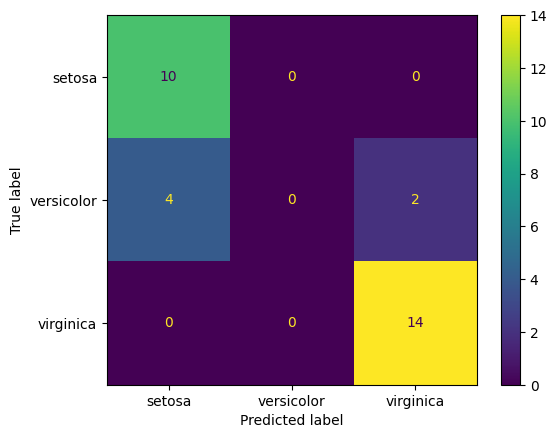

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=iris_dataset['target_names'])
cmd.plot()

In [75]:
actual_vs_pred[
    (actual_vs_pred['y_test']=='versicolor')&
    (actual_vs_pred['y_pred']=='virginica')
]

,y_test,y_pred
2,versicolor,virginica
6,versicolor,virginica
